In [1]:
import os, sys, glob, pickle, tables
import numpy as np
import matplotlib.pyplot as plt
import tables
import pandas as pd
sys.path.append('/home/amcclure/.local/lib/python3.10/site-packages')  # <-- teach jupyterhub where I installed it for myself
import simweights

In [2]:
def weighting(path):
    weighter = None
    filelist = glob.glob(path)

    for filename in filelist:
        file_obj = tables.open_file(filename, 'r')
    
        if weighter is None:
            weighter = simweights.IceTopWeighter(file_obj)
        else:
            weighter += simweights.IceTopWeighter(file_obj)
    return weighter

In [3]:
#Loading pickling files to use: see Tommy's Pickling Code
#to pickle data and load this way: (github: fmcnallyi3/it_anisotropy/rigidity/pickler.ipynb)
#pickler may use a more updated code to load files --> can replace this cell with that code

# Load in the SIBYLL2.1 particle sims
weighter = None

primary_energy = []
hits = []
particle_type = []
weights_type = []
reco = []
showerplanezen = []
laputopzen = []
splineweights = []

if os.path.isfile('energy.pkl'):
    with open('energy.pkl', 'rb') as file:
        primary_energy = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('hits.pkl'): 
    with open('hits.pkl', 'rb') as file:
        hits = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)
    
if os.path.isfile('type.pkl'):
    with open('type.pkl', 'rb') as file:
        particle_type = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('weights.pkl'):
    with open('weights.pkl', 'rb') as file:
        weights_type = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('reco.pkl'):
    with open('reco.pkl', 'rb') as file:
        reco = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('showerplanezen.pkl'):
    with open('showerplanezen.pkl', 'rb') as file:
        showerplanezen = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('laputopzen.pkl'):
    with open('laputopzen.pkl', 'rb') as file:
        laputopzen = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('splineweights.pkl'):
    with open('splineweights.pkl', 'rb') as file:
        splineweights = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

In [22]:
#Data Frame to sort events based on tier, energy, weighter type, etc.
df = pd.DataFrame({'nStations': hits, 'Primary Energy': primary_energy, 'weights': weights_type, 'type': particle_type, 'reco': reco, 'showerplane': showerplanezen, 'laputop': laputopzen, 'splineweights': splineweights})
#print(df)

In [5]:
protoncut = (particle_type==2212.0)
heliumcut = (particle_type==1000020040.0)
oxygencut = (particle_type==1000080160.0)
ironcut = (particle_type==1000260560.0)

In [6]:
#Need zenith angle cuts (cut all events over 55 degrees)
rad55 = np.radians(55)
eV = 1e9
PeV = 1e15
zenrad = (55 * np.pi) / 180
#print(zenrad)

In [7]:
#H4a
#with reco passed quality cut and showerplane and laputop zenith angle cuts
#no reco passed cut for tier 1, because reco cut fails for all tier 1 events
#tier 1
tier1_ = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['showerplane'] < rad55)] #& (df['reco']==1)]
tier1energy_ = tier1_['Primary Energy'].to_numpy()
weightstier1_ = tier1_['weights'].to_numpy()

#tier 1 proton
tier1p_ = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==2212.0) & (df['showerplane'] < rad55)] #(df['reco']==1)}
t1penergy_ = tier1p_['Primary Energy'].to_numpy()
weightst1p_ = tier1p_['weights'].to_numpy()

#tier 1 helium
tier1h_ = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000020040.0) & (df['showerplane'] < rad55)]
t1henergy_ = tier1h_['Primary Energy'].to_numpy()
weightst1h_ = tier1h_['weights'].to_numpy()

#tier 1 oxygen
tier1o_ = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000080160.0) & (df['showerplane'] < rad55)]
t1oenergy_ = tier1o_['Primary Energy'].to_numpy()
weightst1o_ = tier1o_['weights'].to_numpy()

#tier 1 iron
tier1Fe_ = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000260560.0) & (df['showerplane'] < rad55)] #(df['reco']==1)]
t1Feenergy_ = tier1Fe_['Primary Energy'].to_numpy()
weightst1Fe_ = tier1Fe_['weights'].to_numpy()

#tier 2
tier2_ = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['reco']==1) & (df['laputop'] < rad55)]
tier2energy_ = tier2_['Primary Energy'].to_numpy()
weightstier2_ = tier2_['weights'].to_numpy()

#tier 2 proton
tier2p_ = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==2212.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t2penergy_ = tier2p_['Primary Energy'].to_numpy()
weightst2p_ = tier2p_['weights'].to_numpy()

#tier 2 helium
tier2h_ = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000020040.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t2henergy_ = tier2h_['Primary Energy'].to_numpy()
weightst2h_ = tier2h_['weights'].to_numpy()

#tier 2 oxygen
tier2o_ = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000080160.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t2oenergy_ = tier2o_['Primary Energy'].to_numpy()
weightst2o_ = tier2o_['weights'].to_numpy()

#tier 2 iron
tier2Fe_ = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000260560.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t2Feenergy_ = tier2Fe_['Primary Energy'].to_numpy()
weightst2Fe_ = tier2Fe_['weights'].to_numpy()

#tier 3 
tier3_ = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['reco']==1) & (df['laputop'] < rad55)]
tier3energy_ = tier3_['Primary Energy'].to_numpy()
weightstier3_ = tier3_['weights'].to_numpy()

#tier 3 proton
tier3p_ = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==2212.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t3penergy_ = tier3p_['Primary Energy'].to_numpy()
weightst3p_ = tier3p_['weights'].to_numpy()

#tier 3 helium
tier3h_ = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000020040.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t3henergy_ = tier3h_['Primary Energy'].to_numpy()
weightst3h_ = tier3h_['weights'].to_numpy()

#tier 3 oxygen
tier3o_ = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000080160.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t3oenergy_ = tier3o_['Primary Energy'].to_numpy()
weightst3o_ = tier3o_['weights'].to_numpy()

#tier 3 iron
tier3Fe_ = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000260560.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t3Feenergy_ = tier3Fe_['Primary Energy'].to_numpy()
weightst3Fe_ = tier3Fe_['weights'].to_numpy()

#tier 4
tier4_ = df[(df['nStations'] >= 16) & (df['reco']==1) & (df['laputop'] < rad55)]
tier4energy_ = tier4_['Primary Energy'].to_numpy()
weightstier4_ = tier4_['weights'].to_numpy()

#tier 4 proton
tier4p_ = df[(df['nStations'] >= 16) & (df['type'] ==2212.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t4penergy_ = tier4p_['Primary Energy'].to_numpy()
weightst4p_ = tier4p_['weights'].to_numpy()

#tier 4 helium
tier4h_ = df[(df['nStations'] >= 16) & (df['type'] ==1000020040.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t4henergy_ = tier4h_['Primary Energy'].to_numpy()
weightst4h_ = tier4h_['weights'].to_numpy()

#tier 4 oxygen
tier4o_ = df[(df['nStations'] >= 16) & (df['type'] ==1000080160.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t4oenergy_ = tier4o_['Primary Energy'].to_numpy()
weightst4o_ = tier4o_['weights'].to_numpy()

#tier 4 iron
tier4Fe_ = df[(df['nStations'] >= 16) & (df['type'] ==1000260560.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t4Feenergy_ = tier4Fe_['Primary Energy'].to_numpy()
weightst4Fe_ = tier4Fe_['weights'].to_numpy()

In [8]:
#GSF
#with reco passed quality cut and showerplane and laputop zenith angle cuts
#no reco passed cut for tier 1, because reco cut fails for all tier 1 events
#tier 1
tier1 = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['showerplane'] < rad55)] #& (df['reco']==1)]
tier1energy = tier1['Primary Energy'].to_numpy()
weightstier1 = tier1['splineweights'].to_numpy()

#tier 1 proton
tier1p = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==2212.0) & (df['showerplane'] < rad55)] #(df['reco']==1)}
t1penergy = tier1p['Primary Energy'].to_numpy()
weightst1p = tier1p['splineweights'].to_numpy()

#tier 1 helium
tier1h = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000020040.0) & (df['showerplane'] < rad55)]
t1henergy = tier1h['Primary Energy'].to_numpy()
weightst1h = tier1h['splineweights'].to_numpy()

#tier 1 oxygen
tier1o = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000080160.0) & (df['showerplane'] < rad55)]
t1oenergy = tier1o['Primary Energy'].to_numpy()
weightst1o = tier1o['splineweights'].to_numpy()

#tier 1 iron
tier1Fe = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000260560.0) & (df['showerplane'] < rad55)] #(df['reco']==1)]
t1Feenergy = tier1Fe['Primary Energy'].to_numpy()
weightst1Fe = tier1Fe['splineweights'].to_numpy()

#tier 2
tier2 = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['reco']==1) & (df['laputop'] < rad55)]
tier2energy = tier2['Primary Energy'].to_numpy()
weightstier2 = tier2['splineweights'].to_numpy()

#tier 2 proton
tier2p = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==2212.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t2penergy = tier2p['Primary Energy'].to_numpy()
weightst2p = tier2p['splineweights'].to_numpy()

#tier 2 helium
tier2h = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000020040.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t2henergy = tier2h['Primary Energy'].to_numpy()
weightst2h = tier2h['splineweights'].to_numpy()

#tier 2 oxygen
tier2o = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000080160.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t2oenergy = tier2o['Primary Energy'].to_numpy()
weightst2o = tier2o['splineweights'].to_numpy()

#tier 2 iron
tier2Fe = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000260560.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t2Feenergy = tier2Fe['Primary Energy'].to_numpy()
weightst2Fe = tier2Fe['splineweights'].to_numpy()

#tier 3 
tier3 = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['reco']==1) & (df['laputop'] < rad55)]
tier3energy = tier3['Primary Energy'].to_numpy()
weightstier3 = tier3['splineweights'].to_numpy()

#tier 3 proton
tier3p = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==2212.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t3penergy = tier3p['Primary Energy'].to_numpy()
weightst3p = tier3p['splineweights'].to_numpy()

#tier 3 helium
tier3h = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000020040.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t3henergy = tier3h['Primary Energy'].to_numpy()
weightst3h = tier3h['splineweights'].to_numpy()

#tier 3 oxygen
tier3o = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000080160.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t3oenergy = tier3o['Primary Energy'].to_numpy()
weightst3o = tier3o['splineweights'].to_numpy()

#tier 3 iron
tier3Fe = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000260560.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t3Feenergy = tier3Fe['Primary Energy'].to_numpy()
weightst3Fe = tier3Fe['splineweights'].to_numpy()

#tier 4
tier4 = df[(df['nStations'] >= 16) & (df['reco']==1) & (df['laputop'] < rad55)]
tier4energy = tier4['Primary Energy'].to_numpy()
weightstier4 = tier4['splineweights'].to_numpy()

#tier 4 proton
tier4p = df[(df['nStations'] >= 16) & (df['type'] ==2212.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t4penergy = tier4p['Primary Energy'].to_numpy()
weightst4p = tier4p['splineweights'].to_numpy()

#tier 4 helium
tier4h = df[(df['nStations'] >= 16) & (df['type'] ==1000020040.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t4henergy = tier4h['Primary Energy'].to_numpy()
weightst4h = tier4h['splineweights'].to_numpy()

#tier 4 oxygen
tier4o = df[(df['nStations'] >= 16) & (df['type'] ==1000080160.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t4oenergy = tier4o['Primary Energy'].to_numpy()
weightst4o = tier4o['splineweights'].to_numpy()

#tier 4 iron
tier4Fe = df[(df['nStations'] >= 16) & (df['type'] ==1000260560.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t4Feenergy = tier4Fe['Primary Energy'].to_numpy()
weightst4Fe = tier4Fe['splineweights'].to_numpy()

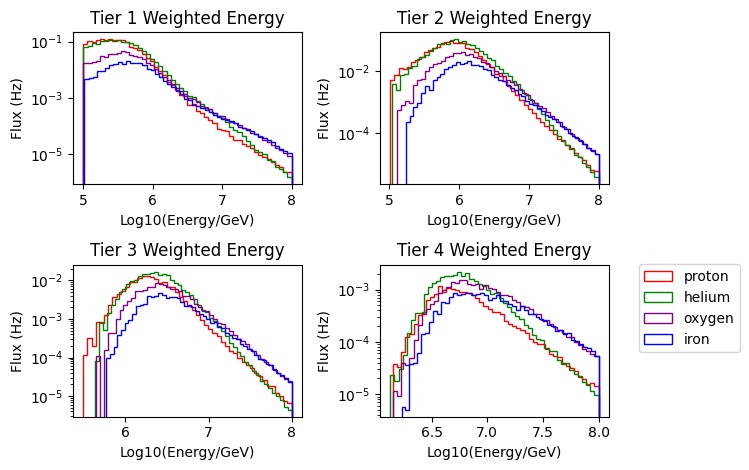

In [9]:
#H4a: Flux vs. Energy
#tier 1
ax = plt.subplot(2, 2, 1)
plt.tight_layout()
(t1p_, binst1p_, p1_) = plt.hist(np.log10(t1penergy_), bins=50, log=True, weights=weightst1p_, histtype='step', color='red', label='proton')
(t1h_, binst1h_, p2_) = plt.hist(np.log10(t1henergy_), bins=50, log=True, weights=weightst1h_, histtype='step', color='green', label='helium')
(t1o_, binst1o_, p3_) = plt.hist(np.log10(t1oenergy_), bins=50, log=True, weights=weightst1o_, histtype='step', color='purple', label='oxygen')
(t1Fe_, binst1Fe_, p4_) = plt.hist(np.log10(t1Feenergy_), bins=50, log=True, weights=weightst1Fe_, histtype='step', color='blue', label='iron')
plt.title('Tier 1 Weighted Energy')
plt.xlabel('Log10(Energy/GeV)')
plt.ylabel('Flux (Hz)')

#tier 2
ax = plt.subplot(2, 2, 2)
plt.tight_layout()
(t2p_, binst2p_, p5_) = plt.hist(np.log10(t2penergy_), bins=50, log=True, weights=weightst2p_, histtype='step', color='red', label='proton')
(t2h_, binst2h_, p6_) = plt.hist(np.log10(t2henergy_), bins=50, log=True, weights=weightst2h_, histtype='step', color='green', label='helium')
(t2o_, binst2o_, p7_) = plt.hist(np.log10(t2oenergy_), bins=50, log=True, weights=weightst2o_, histtype='step', color='purple', label='oxygen')
(t2Fe_, binst2Fe_, p8_) = plt.hist(np.log10(t2Feenergy_), bins=50, log=True, weights=weightst2Fe_, histtype='step', color='blue', label='iron')
plt.title('Tier 2 Weighted Energy')
plt.xlabel('Log10(Energy/GeV)')
plt.ylabel('Flux (Hz)')

#tier 3
ax = plt.subplot(2, 2, 3)
plt.tight_layout()
(t3p_, binst3p_, p9_) = plt.hist(np.log10(t3penergy_), bins=50, log=True, weights=weightst3p_, histtype='step', color='red', label='proton')
(t3h_, binst3h_, p10_) = plt.hist(np.log10(t3henergy_), bins=50, log=True, weights=weightst3h_, histtype='step', color='green', label='helium')
(t3o_, binst3o_, p11_) = plt.hist(np.log10(t3oenergy_), bins=50, log=True, weights=weightst3o_, histtype='step', color='purple', label='oxygen')
(t3Fe_, binst3Fe_, p12_) = plt.hist(np.log10(t3Feenergy_), bins=50, log=True, weights=weightst3Fe_, histtype='step', color='blue', label='iron')
plt.title('Tier 3 Weighted Energy')
plt.xlabel('Log10(Energy/GeV)')
plt.ylabel('Flux (Hz)')

#tier 4
ax = plt.subplot(2, 2, 4)
plt.tight_layout()
(t4p_, binst4p_, p13_) = plt.hist(np.log10(t4penergy_), bins=50, log=True, weights=weightst4p_, histtype='step', color='red', label='proton')
(t4h_, binst4h_, p14_) = plt.hist(np.log10(t4henergy_), bins=50, log=True, weights=weightst4h_, histtype='step', color='green', label='helium')
(t4o_, binst4o_, p15_) = plt.hist(np.log10(t4oenergy_), bins=50, log=True, weights=weightst4o_, histtype='step', color='purple', label='oxygen')
(t4Fe_, binst4Fe_, p16_) = plt.hist(np.log10(t4Feenergy_), bins=50, log=True, weights=weightst4Fe_, histtype='step', color='blue', label='iron')
plt.title('Tier 4 Weighted Energy')
plt.xlabel('Log10(Energy/GeV)')
plt.ylabel('Flux (Hz)')

plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

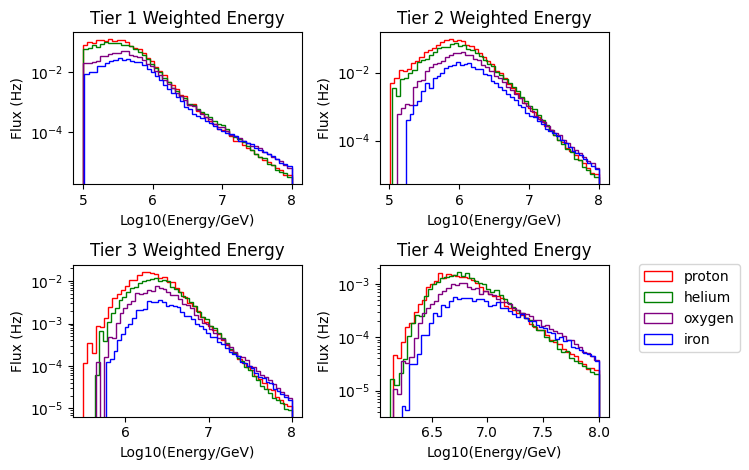

In [10]:
#GSF: Flux vs. Energy
#tier 1
ax = plt.subplot(2, 2, 1)
plt.tight_layout()
(t1p, binst1p, p1) = plt.hist(np.log10(t1penergy), bins=50, log=True, weights=weightst1p, histtype='step', color='red', label='proton')
(t1h, binst1h, p2) = plt.hist(np.log10(t1henergy), bins=50, log=True, weights=weightst1h, histtype='step', color='green', label='helium')
(t1o, binst1o, p3) = plt.hist(np.log10(t1oenergy), bins=50, log=True, weights=weightst1o, histtype='step', color='purple', label='oxygen')
(t1Fe, binst1Fe, p4) = plt.hist(np.log10(t1Feenergy), bins=50, log=True, weights=weightst1Fe, histtype='step', color='blue', label='iron')
plt.title('Tier 1 Weighted Energy')
plt.xlabel('Log10(Energy/GeV)')
plt.ylabel('Flux (Hz)')

#tier 2
ax = plt.subplot(2, 2, 2)
plt.tight_layout()
(t2p, binst2p, p5) = plt.hist(np.log10(t2penergy), bins=50, log=True, weights=weightst2p, histtype='step', color='red', label='proton')
(t2h, binst2h, p6) = plt.hist(np.log10(t2henergy), bins=50, log=True, weights=weightst2h, histtype='step', color='green', label='helium')
(t2o, binst2o, p7) = plt.hist(np.log10(t2oenergy), bins=50, log=True, weights=weightst2o, histtype='step', color='purple', label='oxygen')
(t2Fe, binst2Fe, p8) = plt.hist(np.log10(t2Feenergy), bins=50, log=True, weights=weightst2Fe, histtype='step', color='blue', label='iron')
plt.title('Tier 2 Weighted Energy')
plt.xlabel('Log10(Energy/GeV)')
plt.ylabel('Flux (Hz)')

#tier 3
ax = plt.subplot(2, 2, 3)
plt.tight_layout()
(t3p, binst3p, p9) = plt.hist(np.log10(t3penergy), bins=50, log=True, weights=weightst3p, histtype='step', color='red', label='proton')
(t3h, binst3h, p10) = plt.hist(np.log10(t3henergy), bins=50, log=True, weights=weightst3h, histtype='step', color='green', label='helium')
(t3o, binst3o, p11) = plt.hist(np.log10(t3oenergy), bins=50, log=True, weights=weightst3o, histtype='step', color='purple', label='oxygen')
(t3Fe, binst3Fe, p12) = plt.hist(np.log10(t3Feenergy), bins=50, log=True, weights=weightst3Fe, histtype='step', color='blue', label='iron')
plt.title('Tier 3 Weighted Energy')
plt.xlabel('Log10(Energy/GeV)')
plt.ylabel('Flux (Hz)')

#tier 4
ax = plt.subplot(2, 2, 4)
plt.tight_layout()
(t4p, binst4p, p13) = plt.hist(np.log10(t4penergy), bins=50, log=True, weights=weightst4p, histtype='step', color='red', label='proton')
(t4h, binst4h, p14) = plt.hist(np.log10(t4henergy), bins=50, log=True, weights=weightst4h, histtype='step', color='green', label='helium')
(t4o, binst4o, p15) = plt.hist(np.log10(t4oenergy), bins=50, log=True, weights=weightst4o, histtype='step', color='purple', label='oxygen')
(t4Fe, binst4Fe, p16) = plt.hist(np.log10(t4Feenergy), bins=50, log=True, weights=weightst4Fe, histtype='step', color='blue', label='iron')
plt.title('Tier 4 Weighted Energy')
plt.xlabel('Log10(Energy/GeV)')
plt.ylabel('Flux (Hz)')

plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [11]:
#H4a: applying rigidity cuts

#bin centering (energy)
cbinst1p_ = (binst1p_[1:] + binst1p_[:-1]) / 2
cbinst1h_ = (binst1h_[1:] + binst1h_[:-1]) / 2
cbinst1o_ = (binst1o_[1:] + binst1o_[:-1]) / 2
cbinst1Fe_ = (binst1Fe_[1:] + binst1Fe_[:-1]) / 2

cbinst2p_ = (binst2p_[1:] + binst2p_[:-1]) / 2
cbinst2h_ = (binst2h_[1:] + binst2h_[:-1]) / 2
cbinst2o_ = (binst2o_[1:] + binst2o_[:-1]) / 2
cbinst2Fe_ = (binst2Fe_[1:] + binst2Fe_[:-1]) / 2

cbinst3p_ = (binst3p_[1:] + binst3p_[:-1]) / 2
cbinst3h_ = (binst3h_[1:] + binst3h_[:-1]) / 2
cbinst3o_ = (binst3o_[1:] + binst3o_[:-1]) / 2
cbinst3Fe_ = (binst3Fe_[1:] + binst3Fe_[:-1]) / 2

cbinst4p_ = (binst4p_[1:] + binst4p_[:-1]) / 2
cbinst4h_ = (binst4h_[1:] + binst4h_[:-1]) / 2
cbinst4o_ = (binst4o_[1:] + binst4o_[:-1]) / 2
cbinst4Fe_ = (binst4Fe_[1:] + binst4Fe_[:-1]) / 2

#z values
protonz = 1
Hez = 2
Oz = 16
Fez = 26

#log z values
log10protonz = 0
log10Hez = np.log10(Hez)
log10Oz = np.log10(Oz)
log10Fez = np.log10(Fez)

#log10 rigidity values
log10t1prigidity_ = cbinst1p_ - log10protonz
log10t1hrigidity_ = cbinst1h_ - log10Hez
log10t1origidity_ = cbinst1o_ - log10Oz
log10t1Ferigidity_ = cbinst1Fe_ - log10Fez

log10t2prigidity_ = cbinst2p_ - log10protonz
log10t2hrigidity_ = cbinst2h_ - log10Hez
log10t2origidity_ = cbinst2o_ - log10Oz
log10t2Ferigidity_ = cbinst2Fe_ - log10Fez

log10t3prigidity_ = cbinst3p_ - log10protonz
log10t3hrigidity_ = cbinst3h_ - log10Hez
log10t3origidity_ = cbinst3o_ - log10Oz
log10t3Ferigidity_ = cbinst3Fe_ - log10Fez

log10t4prigidity_ = cbinst4p_ - log10protonz
log10t4hrigidity_ = cbinst4h_ - log10Hez
log10t4origidity_ = cbinst4o_ - log10Oz
log10t4Ferigidity_ = cbinst4Fe_ - log10Fez

In [12]:
#GSF: applying rigidity cuts

#bin centering (energy)
cbinst1p = (binst1p[1:] + binst1p[:-1]) / 2
cbinst1h = (binst1h[1:] + binst1h[:-1]) / 2
cbinst1o = (binst1o[1:] + binst1o[:-1]) / 2
cbinst1Fe = (binst1Fe[1:] + binst1Fe[:-1]) / 2

cbinst2p = (binst2p[1:] + binst2p[:-1]) / 2
cbinst2h = (binst2h[1:] + binst2h[:-1]) / 2
cbinst2o = (binst2o[1:] + binst2o[:-1]) / 2
cbinst2Fe = (binst2Fe[1:] + binst2Fe[:-1]) / 2

cbinst3p = (binst3p[1:] + binst3p[:-1]) / 2
cbinst3h = (binst3h[1:] + binst3h[:-1]) / 2
cbinst3o = (binst3o[1:] + binst3o[:-1]) / 2
cbinst3Fe = (binst3Fe[1:] + binst3Fe[:-1]) / 2

cbinst4p = (binst4p[1:] + binst4p[:-1]) / 2
cbinst4h = (binst4h[1:] + binst4h[:-1]) / 2
cbinst4o = (binst4o[1:] + binst4o[:-1]) / 2
cbinst4Fe = (binst4Fe[1:] + binst4Fe[:-1]) / 2

#log10 rigidity values
log10t1prigidity = cbinst1p - log10protonz
log10t1hrigidity = cbinst1h - log10Hez
log10t1origidity = cbinst1o - log10Oz
log10t1Ferigidity = cbinst1Fe - log10Fez

log10t2prigidity = cbinst2p - log10protonz
log10t2hrigidity = cbinst2h - log10Hez
log10t2origidity = cbinst2o - log10Oz
log10t2Ferigidity = cbinst2Fe - log10Fez

log10t3prigidity = cbinst3p - log10protonz
log10t3hrigidity = cbinst3h - log10Hez
log10t3origidity = cbinst3o - log10Oz
log10t3Ferigidity = cbinst3Fe - log10Fez

log10t4prigidity = cbinst4p - log10protonz
log10t4hrigidity = cbinst4h - log10Hez
log10t4origidity = cbinst4o - log10Oz
log10t4Ferigidity = cbinst4Fe - log10Fez

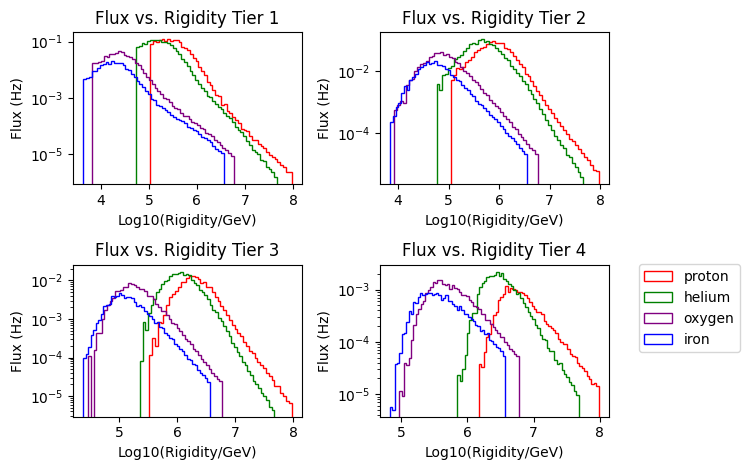

In [13]:
#H4a: Flux vs. Rigidity: Separate Composition
#tier 1
ax = plt.subplot(2, 2, 1)
plt.tight_layout()
(t1rp_, binst1rp_, p1r_) = plt.hist(log10t1prigidity_, bins=50, log=True, weights=t1p_, histtype='step', color='red', label='proton')
(t1rh_, binst1rh_, p2r_) = plt.hist(log10t1hrigidity_, bins=50, log=True, weights=t1h_, histtype='step', color='green', label='helium')
(t1ro_, binst1ro_, p3r_) = plt.hist(log10t1origidity_, bins=50, log=True, weights=t1o_, histtype='step', color='purple', label='oxygen')
(t1rFe_, binst1rFe_, p4r_) = plt.hist(log10t1Ferigidity_, bins=50, log=True, weights=t1Fe_, histtype='step', color='blue', label='iron')
plt.title('Flux vs. Rigidity Tier 1')
plt.xlabel('Log10(Rigidity/GeV)')
plt.ylabel('Flux (Hz)')

#tier 2
ax = plt.subplot(2, 2, 2)
plt.tight_layout()
(t2rp_, binst2rp_, p5r_) = plt.hist(log10t2prigidity_, bins=50, log=True, weights=t2p_, histtype='step', color='red', label='proton')
(t2rh_, binst2rh_, p6r_) = plt.hist(log10t2hrigidity_, bins=50, log=True, weights=t2h_, histtype='step', color='green', label='helium')
(t2ro_, binst2ro_, p7r_) = plt.hist(log10t2origidity_, bins=50, log=True, weights=t2o_, histtype='step', color='purple', label='oxygen')
(t2rFe_, binst2rFe_, p8r_) = plt.hist(log10t2Ferigidity_, bins=50, log=True, weights=t2Fe_, histtype='step', color='blue', label='iron')
plt.title('Flux vs. Rigidity Tier 2')
plt.xlabel('Log10(Rigidity/GeV)')
plt.ylabel('Flux (Hz)')

#tier 3
ax = plt.subplot(2, 2, 3)
plt.tight_layout()
(t3rp_, binst3rp_, p9r_) = plt.hist(log10t3prigidity_, bins=50, log=True, weights=t3p_, histtype='step', color='red', label='proton')
(t3rh_, binst3rh_, p10r_) = plt.hist(log10t3hrigidity_, bins=50, log=True, weights=t3h_, histtype='step', color='green', label='helium')
(t3ro_, binst3ro_, p11r_) = plt.hist(log10t3origidity_, bins=50, log=True, weights=t3o_, histtype='step', color='purple', label='oxygen')
(t3rFe_, binst3rFe_, p12r_) = plt.hist(log10t3Ferigidity_, bins=50, log=True, weights=t3Fe_, histtype='step', color='blue', label='iron')
plt.title('Flux vs. Rigidity Tier 3')
plt.xlabel('Log10(Rigidity/GeV)')
plt.ylabel('Flux (Hz)')

#tier 4
ax = plt.subplot(2, 2, 4)
plt.tight_layout()
(t4rp_, binst4rp_, p13r_) = plt.hist(log10t4prigidity_, bins=50, log=True, weights=t4p_, histtype='step', color='red', label='proton')
(t4rh_, binst4rh_, p14r_) = plt.hist(log10t4hrigidity_, bins=50, log=True, weights=t4h_, histtype='step', color='green', label='helium')
(t4ro_, binst4ro_, p15r_) = plt.hist(log10t4origidity_, bins=50, log=True, weights=t4o_, histtype='step', color='purple', label='oxygen')
(t4rFe_, binst4rFe_, p16r_) = plt.hist(log10t4Ferigidity_, bins=50, log=True, weights=t4Fe_, histtype='step', color='blue', label='iron')
plt.title('Flux vs. Rigidity Tier 4')
plt.xlabel('Log10(Rigidity/GeV)')
plt.ylabel('Flux (Hz)')
plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

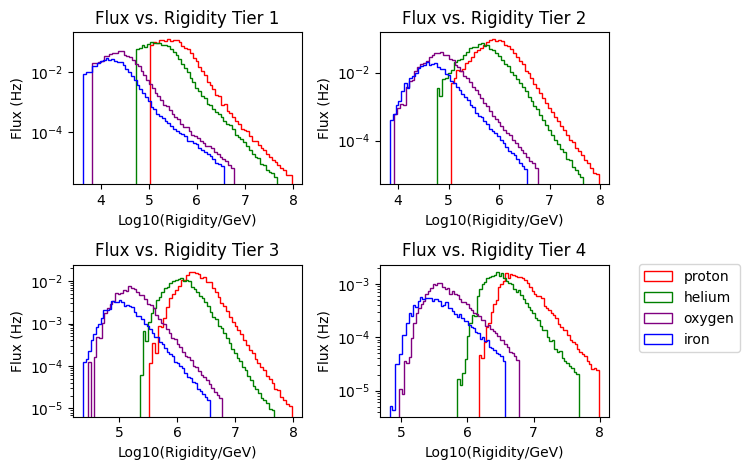

In [15]:
#GSF: Flux vs. Rigidity: Separate Composition
#tier 1
ax = plt.subplot(2, 2, 1)
plt.tight_layout()
(t1rp, binst1rp, p1r) = plt.hist(log10t1prigidity, bins=50, log=True, weights=t1p, histtype='step', color='red', label='proton')
(t1rh, binst1rh, p2r) = plt.hist(log10t1hrigidity, bins=50, log=True, weights=t1h, histtype='step', color='green', label='helium')
(t1ro, binst1ro, p3r) = plt.hist(log10t1origidity, bins=50, log=True, weights=t1o, histtype='step', color='purple', label='oxygen')
(t1rFe, binst1rFe, p4r) = plt.hist(log10t1Ferigidity, bins=50, log=True, weights=t1Fe, histtype='step', color='blue', label='iron')
plt.title('Flux vs. Rigidity Tier 1')
plt.xlabel('Log10(Rigidity/GeV)')
plt.ylabel('Flux (Hz)')

#tier 2
ax = plt.subplot(2, 2, 2)
plt.tight_layout()
(t2rp, binst2rp, p5r) = plt.hist(log10t2prigidity, bins=50, log=True, weights=t2p, histtype='step', color='red', label='proton')
(t2rh, binst2rh, p6r) = plt.hist(log10t2hrigidity, bins=50, log=True, weights=t2h, histtype='step', color='green', label='helium')
(t2ro, binst2ro, p7r) = plt.hist(log10t2origidity, bins=50, log=True, weights=t2o, histtype='step', color='purple', label='oxygen')
(t2rFe, binst2rFe, p8r) = plt.hist(log10t2Ferigidity, bins=50, log=True, weights=t2Fe, histtype='step', color='blue', label='iron')
plt.title('Flux vs. Rigidity Tier 2')
plt.xlabel('Log10(Rigidity/GeV)')
plt.ylabel('Flux (Hz)')

#tier 3
ax = plt.subplot(2, 2, 3)
plt.tight_layout()
(t3rp, binst3rp, p9r) = plt.hist(log10t3prigidity, bins=50, log=True, weights=t3p, histtype='step', color='red', label='proton')
(t3rh, binst3rh, p10r) = plt.hist(log10t3hrigidity, bins=50, log=True, weights=t3h, histtype='step', color='green', label='helium')
(t3ro, binst3ro, p11r) = plt.hist(log10t3origidity, bins=50, log=True, weights=t3o, histtype='step', color='purple', label='oxygen')
(t3rFe, binst3rFe, p12r) = plt.hist(log10t3Ferigidity, bins=50, log=True, weights=t3Fe, histtype='step', color='blue', label='iron')
plt.title('Flux vs. Rigidity Tier 3')
plt.xlabel('Log10(Rigidity/GeV)')
plt.ylabel('Flux (Hz)')

#tier 4
ax = plt.subplot(2, 2, 4)
plt.tight_layout()
(t4rp, binst4rp, p13r) = plt.hist(log10t4prigidity, bins=50, log=True, weights=t4p, histtype='step', color='red', label='proton')
(t4rh, binst4rh, p14r) = plt.hist(log10t4hrigidity, bins=50, log=True, weights=t4h, histtype='step', color='green', label='helium')
(t4ro, binst4ro, p15r) = plt.hist(log10t4origidity, bins=50, log=True, weights=t4o, histtype='step', color='purple', label='oxygen')
(t4rFe, binst4rFe, p16r) = plt.hist(log10t4Ferigidity, bins=50, log=True, weights=t4Fe, histtype='step', color='blue', label='iron')
plt.title('Flux vs. Rigidity Tier 4')
plt.xlabel('Log10(Rigidity/GeV)')
plt.ylabel('Flux (Hz)')
plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

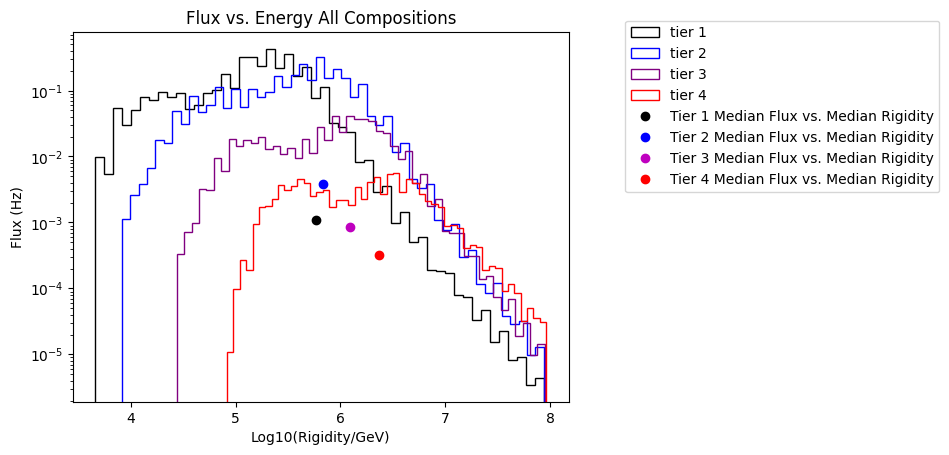

 Median(Log10(rigidity)): 5.77 GeV
 Median(Log10(rigidity)): 5.83 GeV
 Median(Log10(rigidity)): 6.09 GeV
 Median(Log10(rigidity)): 6.37 GeV


In [14]:
#H4a:
#center of bins:
#tier1
cbinst1rp_ = (binst1rp_[1:] + binst1rp_[:-1]) / 2
cbinst1rh_ = (binst1rh_[1:] + binst1rh_[:-1]) / 2
cbinst1ro_ = (binst1ro_[1:] + binst1ro_[:-1]) / 2
cbinst1rFe_ = (binst1rFe_[1:] + binst1rFe_[:-1]) / 2

#tier2
cbinst2rp_ = (binst2rp_[1:] + binst2rp_[:-1]) / 2
cbinst2rh_ = (binst2rh_[1:] + binst2rh_[:-1]) / 2
cbinst2ro_ = (binst2ro_[1:] + binst2ro_[:-1]) / 2
cbinst2rFe_ = (binst2rFe_[1:] + binst2ro_[:-1]) / 2

#tier 3
cbinst3rp_ = (binst3rp_[1:] + binst3rp_[:-1]) / 2
cbinst3rh_ = (binst3rh_[1:] + binst3rh_[:-1]) / 2
cbinst3ro_ = (binst3ro_[1:] + binst3ro_[:-1]) / 2
cbinst3rFe_ = (binst3rFe_[1:] + binst3ro_[:-1]) / 2

#tier 4
cbinst4rp_ = (binst4rp_[1:] + binst4rp_[:-1]) / 2
cbinst4rh_ = (binst4rh_[1:] + binst4rh_[:-1]) / 2
cbinst4ro_ = (binst4ro_[1:] + binst4ro_[:-1]) / 2
cbinst4rFe_ = (binst4rFe_[1:] + binst4ro_[:-1]) / 2

#appending all bins and all weights for each tier into 1 array
binst1_ = np.append((np.append(cbinst1rp_, cbinst1rh_)), (np.append(cbinst1ro_, cbinst1rFe_)))
weightst1_ = np.append((np.append(t1rp_, t1rh_)), (np.append(t1ro_, t1rFe_)))
binst2_ = np.append((np.append(cbinst2rp_, cbinst2rh_)), (np.append(cbinst2ro_, cbinst2rFe_)))
weightst2_ = np.append((np.append(t2rp_, t2rh_)), (np.append(t2ro_, t2rFe_)))
binst3_ = np.append((np.append(cbinst3rp_, cbinst3rh_)), (np.append(cbinst3ro_, cbinst3rFe_)))
weightst3_ = np.append((np.append(t3rp_, t3rh_)), (np.append(t3ro_, t3rFe_)))
binst4_ = np.append((np.append(cbinst4rp_, cbinst4rh_)), (np.append(cbinst4ro_, cbinst4rFe_)))
weightst4_ = np.append((np.append(t4rp_, t4rh_)), (np.append(t4ro_, t4rFe_)))

#making dataframes with all bins and all weights
df1 = pd.DataFrame({'bins': binst1_, 'weights': weightst1_})
df2 = pd.DataFrame({'bins': binst2_, 'weights': weightst2_})
df3 = pd.DataFrame({'bins': binst3_, 'weights': weightst3_})
df4 = pd.DataFrame({'bins': binst4_, 'weights': weightst4_})

#plotting
ax = plt.subplot(1, 1, 1)
plt.hist(binst1_, bins=50, weights=weightst1_, log=True, histtype='step', color='black', label='tier 1')
plt.hist(binst2_, bins=50, weights=weightst2_, log=True, histtype='step', color='blue', label='tier 2')
plt.hist(binst3_, bins=50, weights=weightst3_, log=True, histtype='step', color='purple', label='tier 3')
plt.hist(binst4_, bins=50, weights=weightst4_, log=True, histtype='step', color='red', label='tier 4')
plt.title('Flux vs. Energy All Compositions')
plt.xlabel('Log10(Rigidity/GeV)')
plt.ylabel('Flux (Hz)')

#median energy points:
plt.plot(np.median(binst1_), np.median(weightst1_), 'ko', label='Tier 1 Median Flux vs. Median Rigidity')
plt.plot(np.median(binst2_), np.median(weightst2_), 'bo', label='Tier 2 Median Flux vs. Median Rigidity')
plt.plot(np.median(binst3_), np.median(weightst3_), 'mo', label='Tier 3 Median Flux vs. Median Rigidity')
plt.plot(np.median(binst4_), np.median(weightst4_), 'ro', label='Tier 4 Median Flux vs. Median Rigidity')

plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

#Median Rigidity
print(f' Median(Log10(rigidity)): {round(np.median(binst1_), 2)} GeV')
print(f' Median(Log10(rigidity)): {round(np.median(binst2_), 2)} GeV')
print(f' Median(Log10(rigidity)): {round(np.median(binst3_), 2)} GeV')
print(f' Median(Log10(rigidity)): {round(np.median(binst4_), 2)} GeV')

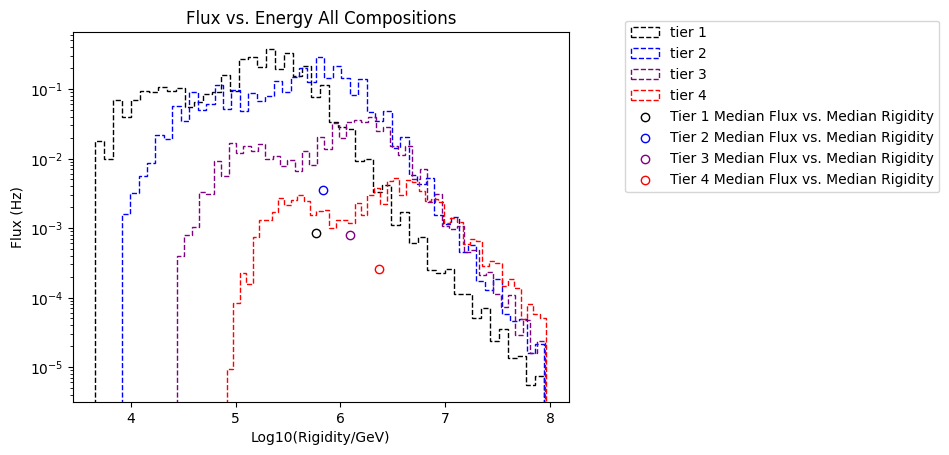

 Median(Log10(rigidity)): 5.77 GeV
 Median(Log10(rigidity)): 5.83 GeV
 Median(Log10(rigidity)): 6.09 GeV
 Median(Log10(rigidity)): 6.37 GeV


In [19]:
#GSF:

#clear points
array1 = [0, 0, 0, 0]
#center of bins:
#tier1
cbinst1rp = (binst1rp[1:] + binst1rp[:-1]) / 2
cbinst1rh = (binst1rh[1:] + binst1rh[:-1]) / 2
cbinst1ro = (binst1ro[1:] + binst1ro[:-1]) / 2
cbinst1rFe = (binst1rFe[1:] + binst1rFe[:-1]) / 2

#tier2
cbinst2rp = (binst2rp[1:] + binst2rp[:-1]) / 2
cbinst2rh = (binst2rh[1:] + binst2rh[:-1]) / 2
cbinst2ro = (binst2ro[1:] + binst2ro[:-1]) / 2
cbinst2rFe = (binst2rFe[1:] + binst2ro[:-1]) / 2

#tier 3
cbinst3rp = (binst3rp[1:] + binst3rp[:-1]) / 2
cbinst3rh = (binst3rh[1:] + binst3rh[:-1]) / 2
cbinst3ro = (binst3ro[1:] + binst3ro[:-1]) / 2
cbinst3rFe = (binst3rFe[1:] + binst3ro[:-1]) / 2

#tier 4
cbinst4rp = (binst4rp[1:] + binst4rp[:-1]) / 2
cbinst4rh = (binst4rh[1:] + binst4rh[:-1]) / 2
cbinst4ro = (binst4ro[1:] + binst4ro[:-1]) / 2
cbinst4rFe = (binst4rFe[1:] + binst4ro[:-1]) / 2

#appending all bins and all weights for each tier into an array
binst1 = np.append((np.append(cbinst1rp, cbinst1rh)), (np.append(cbinst1ro, cbinst1rFe)))
weightst1 = np.append((np.append(t1rp, t1rh)), (np.append(t1ro, t1rFe)))
binst2 = np.append((np.append(cbinst2rp, cbinst2rh)), (np.append(cbinst2ro, cbinst2rFe)))
weightst2 = np.append((np.append(t2rp, t2rh)), (np.append(t2ro, t2rFe)))
binst3 = np.append((np.append(cbinst3rp, cbinst3rh)), (np.append(cbinst3ro, cbinst3rFe)))
weightst3 = np.append((np.append(t3rp, t3rh)), (np.append(t3ro, t3rFe)))
binst4 = np.append((np.append(cbinst4rp, cbinst4rh)), (np.append(cbinst4ro, cbinst4rFe)))
weightst4 = np.append((np.append(t4rp, t4rh)), (np.append(t4ro, t4rFe)))

#making dataframes with all bins and all weights
df1 = pd.DataFrame({'bins': binst1, 'weights': weightst1})
df2 = pd.DataFrame({'bins': binst2, 'weights': weightst2})
df3 = pd.DataFrame({'bins': binst3, 'weights': weightst3})
df4 = pd.DataFrame({'bins': binst4, 'weights': weightst4})

#plotting
ax = plt.subplot(1, 1, 1)
plt.hist(binst1, bins=50, weights=weightst1, log=True, histtype='step', color='black', linestyle='dashed', label='tier 1')
plt.hist(binst2, bins=50, weights=weightst2, log=True, histtype='step', color='blue', linestyle='dashed', label='tier 2')
plt.hist(binst3, bins=50, weights=weightst3, log=True, histtype='step', color='purple', linestyle='dashed', label='tier 3')
plt.hist(binst4, bins=50, weights=weightst4, log=True, histtype='step', color='red', linestyle='dashed', label='tier 4')
plt.title('Flux vs. Energy All Compositions')
plt.xlabel('Log10(Rigidity/GeV)')
plt.ylabel('Flux (Hz)')

#median energy points:
plt.scatter(np.median(binst1), np.median(weightst1), color=array1, edgecolor='black', label='Tier 1 Median Flux vs. Median Rigidity')
plt.scatter(np.median(binst2), np.median(weightst2), color=array1, edgecolor='blue', label='Tier 2 Median Flux vs. Median Rigidity')
plt.scatter(np.median(binst3), np.median(weightst3), color=array1, edgecolor='purple', label='Tier 3 Median Flux vs. Median Rigidity')
plt.scatter(np.median(binst4), np.median(weightst4), color=array1, edgecolor='red', label='Tier 4 Median Flux vs. Median Rigidity')

plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

#Median Rigidity
print(f' Median(Log10(rigidity)): {round(np.median(binst1), 2)} GeV')
print(f' Median(Log10(rigidity)): {round(np.median(binst2), 2)} GeV')
print(f' Median(Log10(rigidity)): {round(np.median(binst3), 2)} GeV')
print(f' Median(Log10(rigidity)): {round(np.median(binst4), 2)} GeV')

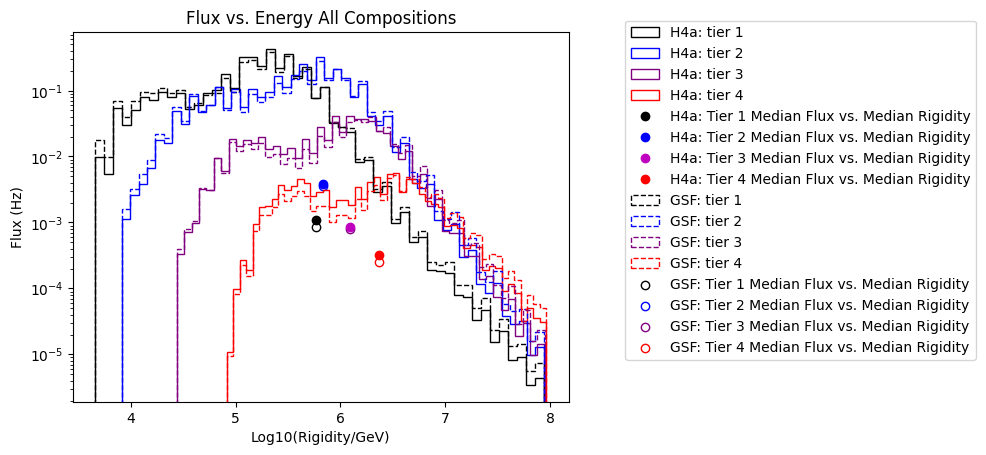

In [21]:
#H4a vs. GSF: Flux vs. Energy All Compositions

#clear points
array1 = [0, 0, 0, 0]

#H4a: center of bins:
#tier1
cbinst1rp_ = (binst1rp_[1:] + binst1rp_[:-1]) / 2
cbinst1rh_ = (binst1rh_[1:] + binst1rh_[:-1]) / 2
cbinst1ro_ = (binst1ro_[1:] + binst1ro_[:-1]) / 2
cbinst1rFe_ = (binst1rFe_[1:] + binst1rFe_[:-1]) / 2

#tier2
cbinst2rp_ = (binst2rp_[1:] + binst2rp_[:-1]) / 2
cbinst2rh_ = (binst2rh_[1:] + binst2rh_[:-1]) / 2
cbinst2ro_ = (binst2ro_[1:] + binst2ro_[:-1]) / 2
cbinst2rFe_ = (binst2rFe_[1:] + binst2ro_[:-1]) / 2

#tier 3
cbinst3rp_ = (binst3rp_[1:] + binst3rp_[:-1]) / 2
cbinst3rh_ = (binst3rh_[1:] + binst3rh_[:-1]) / 2
cbinst3ro_ = (binst3ro_[1:] + binst3ro_[:-1]) / 2
cbinst3rFe_ = (binst3rFe_[1:] + binst3ro_[:-1]) / 2

#tier 4
cbinst4rp_ = (binst4rp_[1:] + binst4rp_[:-1]) / 2
cbinst4rh_ = (binst4rh_[1:] + binst4rh_[:-1]) / 2
cbinst4ro_ = (binst4ro_[1:] + binst4ro_[:-1]) / 2
cbinst4rFe_ = (binst4rFe_[1:] + binst4ro_[:-1]) / 2

#GSF: center of bins:
#tier1
cbinst1rp = (binst1rp[1:] + binst1rp[:-1]) / 2
cbinst1rh = (binst1rh[1:] + binst1rh[:-1]) / 2
cbinst1ro = (binst1ro[1:] + binst1ro[:-1]) / 2
cbinst1rFe = (binst1rFe[1:] + binst1rFe[:-1]) / 2

#tier2
cbinst2rp = (binst2rp[1:] + binst2rp[:-1]) / 2
cbinst2rh = (binst2rh[1:] + binst2rh[:-1]) / 2
cbinst2ro = (binst2ro[1:] + binst2ro[:-1]) / 2
cbinst2rFe = (binst2rFe[1:] + binst2ro[:-1]) / 2

#tier 3
cbinst3rp = (binst3rp[1:] + binst3rp[:-1]) / 2
cbinst3rh = (binst3rh[1:] + binst3rh[:-1]) / 2
cbinst3ro = (binst3ro[1:] + binst3ro[:-1]) / 2
cbinst3rFe = (binst3rFe[1:] + binst3ro[:-1]) / 2

#tier 4
cbinst4rp = (binst4rp[1:] + binst4rp[:-1]) / 2
cbinst4rh = (binst4rh[1:] + binst4rh[:-1]) / 2
cbinst4ro = (binst4ro[1:] + binst4ro[:-1]) / 2
cbinst4rFe = (binst4rFe[1:] + binst4ro[:-1]) / 2

#H4a: appending all bins and all weights into an array
binst1_ = np.append((np.append(cbinst1rp_, cbinst1rh_)), (np.append(cbinst1ro_, cbinst1rFe_)))
weightst1_ = np.append((np.append(t1rp_, t1rh_)), (np.append(t1ro_, t1rFe_)))
binst2_ = np.append((np.append(cbinst2rp_, cbinst2rh_)), (np.append(cbinst2ro_, cbinst2rFe_)))
weightst2_ = np.append((np.append(t2rp_, t2rh_)), (np.append(t2ro_, t2rFe_)))
binst3_ = np.append((np.append(cbinst3rp_, cbinst3rh_)), (np.append(cbinst3ro_, cbinst3rFe_)))
weightst3_ = np.append((np.append(t3rp_, t3rh_)), (np.append(t3ro_, t3rFe_)))
binst4_ = np.append((np.append(cbinst4rp_, cbinst4rh_)), (np.append(cbinst4ro_, cbinst4rFe_)))
weightst4_ = np.append((np.append(t4rp_, t4rh_)), (np.append(t4ro_, t4rFe_)))

#GSF: appending all bins and all weights into an array
binst1 = np.append((np.append(cbinst1rp, cbinst1rh)), (np.append(cbinst1ro, cbinst1rFe)))
weightst1 = np.append((np.append(t1rp, t1rh)), (np.append(t1ro, t1rFe)))
binst2 = np.append((np.append(cbinst2rp, cbinst2rh)), (np.append(cbinst2ro, cbinst2rFe)))
weightst2 = np.append((np.append(t2rp, t2rh)), (np.append(t2ro, t2rFe)))
binst3 = np.append((np.append(cbinst3rp, cbinst3rh)), (np.append(cbinst3ro, cbinst3rFe)))
weightst3 = np.append((np.append(t3rp, t3rh)), (np.append(t3ro, t3rFe)))
binst4 = np.append((np.append(cbinst4rp, cbinst4rh)), (np.append(cbinst4ro, cbinst4rFe)))
weightst4 = np.append((np.append(t4rp, t4rh)), (np.append(t4ro, t4rFe)))

#H4a: making dataframes with all bins and all weights in tier 
df1 = pd.DataFrame({'bins': binst1_, 'weights': weightst1_})
df2 = pd.DataFrame({'bins': binst2_, 'weights': weightst2_})
df3 = pd.DataFrame({'bins': binst3_, 'weights': weightst3_})
df4 = pd.DataFrame({'bins': binst4_, 'weights': weightst4_})

#GSF: making dataframes with all bins and all weights in tier 
df1 = pd.DataFrame({'bins': binst1, 'weights': weightst1})
df2 = pd.DataFrame({'bins': binst2, 'weights': weightst2})
df3 = pd.DataFrame({'bins': binst3, 'weights': weightst3})
df4 = pd.DataFrame({'bins': binst4, 'weights': weightst4})

#H4a: plotting
ax = plt.subplot(1, 1, 1)
plt.hist(binst1_, bins=50, weights=weightst1_, log=True, histtype='step', color='black', label='H4a: tier 1')
plt.hist(binst2_, bins=50, weights=weightst2_, log=True, histtype='step', color='blue', label='H4a: tier 2')
plt.hist(binst3_, bins=50, weights=weightst3_, log=True, histtype='step', color='purple', label='H4a: tier 3')
plt.hist(binst4_, bins=50, weights=weightst4_, log=True, histtype='step', color='red', label='H4a: tier 4')
plt.title('Flux vs. Energy All Compositions')
plt.xlabel('Log10(Rigidity/GeV)')
plt.ylabel('Flux (Hz)')

#H4a: median energy points:
plt.plot(np.median(binst1_), np.median(weightst1_), 'ko', label='H4a: Tier 1 Median Flux vs. Median Rigidity')
plt.plot(np.median(binst2_), np.median(weightst2_), 'bo', label='H4a: Tier 2 Median Flux vs. Median Rigidity')
plt.plot(np.median(binst3_), np.median(weightst3_), 'mo', label='H4a: Tier 3 Median Flux vs. Median Rigidity')
plt.plot(np.median(binst4_), np.median(weightst4_), 'ro', label='H4a: Tier 4 Median Flux vs. Median Rigidity')

#GSF: plotting
ax = plt.subplot(1, 1, 1)
plt.hist(binst1, bins=50, weights=weightst1, log=True, histtype='step', color='black', linestyle='dashed', label='GSF: tier 1')
plt.hist(binst2, bins=50, weights=weightst2, log=True, histtype='step', color='blue', linestyle='dashed', label='GSF: tier 2')
plt.hist(binst3, bins=50, weights=weightst3, log=True, histtype='step', color='purple', linestyle='dashed', label='GSF: tier 3')
plt.hist(binst4, bins=50, weights=weightst4, log=True, histtype='step', color='red', linestyle='dashed', label='GSF: tier 4')
plt.title('Flux vs. Energy All Compositions')
plt.xlabel('Log10(Rigidity/GeV)')
plt.ylabel('Flux (Hz)')

#GSF: median energy points:
plt.scatter(np.median(binst1), np.median(weightst1), color=array1, edgecolor='black', label='GSF: Tier 1 Median Flux vs. Median Rigidity')
plt.scatter(np.median(binst2), np.median(weightst2), color=array1, edgecolor='blue', label='GSF: Tier 2 Median Flux vs. Median Rigidity')
plt.scatter(np.median(binst3), np.median(weightst3), color=array1, edgecolor='purple', label='GSF: Tier 3 Median Flux vs. Median Rigidity')
plt.scatter(np.median(binst4), np.median(weightst4), color=array1, edgecolor='red', label='GSF: Tier 4 Median Flux vs. Median Rigidity')

plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()